In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('D:\Programing\PycharmProjects\geoscientist\well\well1.csv')
data['VELP']=1000000/data.DT
data = data[['DEPTH', 'RHOB', 'VELP', 'GR','FACIES' ]]
data = data.dropna(how='any')

In [3]:
X_train = data.iloc[:,1:4].values
sc = StandardScaler()
X_test =data.iloc[:,1:4].values
X_train = sc.fit_transform(X_train)
Y_train = data.iloc[:,-1].values
print(Y_train)

[1 1 1 ... 1 1 1]


In [4]:
model= OneVsOneClassifier(RandomForestClassifier(n_estimators=500,max_depth=3
                                                            ),
                                           n_jobs=4)
                                           
model.fit(X_train,Y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(max_depth=3,
                                                    n_estimators=500),
                   n_jobs=4)

In [5]:
X_test = X_train

[Text(0.5, 0, 'DEPTH'),
 Text(1.5, 0, 'RHOB'),
 Text(2.5, 0, 'VELP'),
 Text(3.5, 0, 'GR'),
 Text(4.5, 0, 'FACIES')]

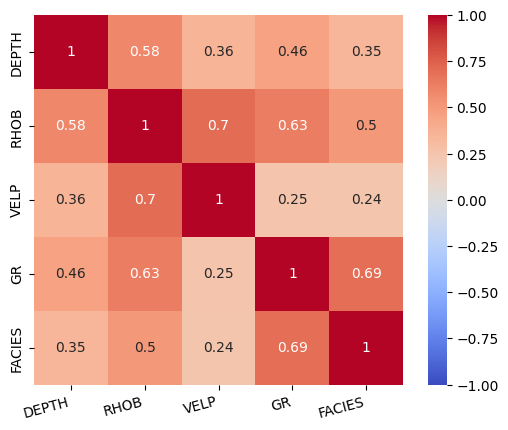

In [6]:
cor_train = data.corr()
cor_test = data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')

[1 1 1 ... 1 1 1]
['DEPTH', 'RHOB', 'VELP', 'GR', 'FACIES']


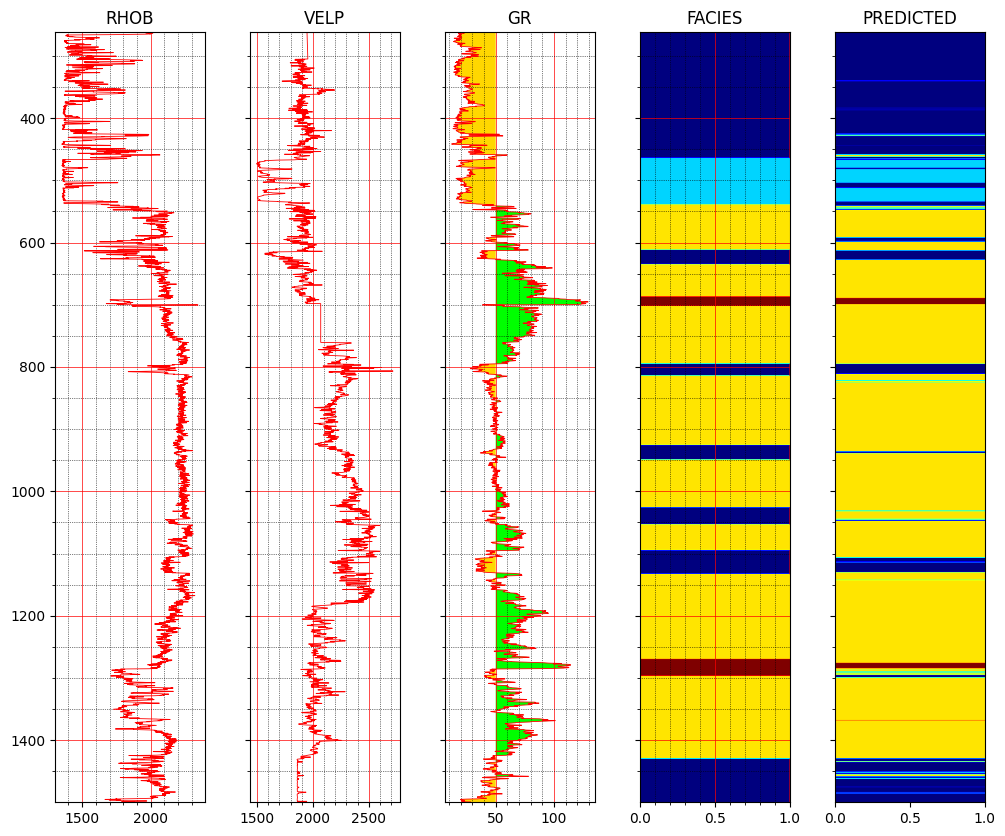

In [7]:
y_pred = model.predict(X_test)
print(y_pred)
mnemonics = list(data.columns)
data = data.values
print(mnemonics)
rows, cols = 1, 5
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1],data[:,0],'r', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].set_title('%s' %mnemonics[i+1])
    if i==cols-2:
        F = np.vstack((data[:,-1],data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('%s' % mnemonics[i + 1])
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 50
y2 = data[:,3]
y1 = y2*0+cl
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0.3)
plt.show()